<a href="https://colab.research.google.com/github/kaigitt/GoogleColab/blob/master/%E3%80%90%E7%A0%82%E5%B7%9D%E5%BF%AB%E6%96%97%E3%80%91%E6%95%99%E5%B8%AB%E3%81%82%E3%82%8A%E5%AD%A6%E7%BF%92%E3%81%AE%E6%BC%94%E7%BF%92_editor_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 教師あり学習の演習

## 0. 事前準備

### 0.1 環境構築

まずは次のセルを実行してください。

In [1]:
# こちらのセルを実行してください。
!pip install openpyxl==3.0.0

     |████████████████████████████████| 172 kB 9.9 MB/s 
  Created wheel for openpyxl: filename=openpyxl-3.0.0-py2.py3-none-any.whl size=241207 sha256=628451f0a176efa42e376a504d0fd7f3ac9697ce2d14596cfbef53499c588384
  Stored in directory: /root/.cache/pip/wheels/c7/64/ff/ce98f6e1d2701ae8e216c875da62feed2839ac8a3cae0ab8af
Successfully built openpyxl
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 3.0.9
    Uninstalling openpyxl-3.0.9:
      Successfully uninstalled openpyxl-3.0.9


実行が完了したら、左上のメニューバーから「ランタイム」 $\rightarrow$ 「ランタイムを再起動」を押してください。

ランタイムの再起動が終わったら、次のセルを実行してください。

In [2]:
# こちらのセルを実行してください。
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

今回使用するデータをダウンロードします。

次のセルを実行してください。

In [3]:
!wget "https://us.v-cdn.net/6032257/uploads/jive_attachments/6/3/1/63186354tnemhcatta.xlsx" -O 'cycle_training.xlsx'

--2022-04-01 14:14:46--  https://us.v-cdn.net/6032257/uploads/jive_attachments/6/3/1/63186354tnemhcatta.xlsx
Resolving us.v-cdn.net (us.v-cdn.net)... 104.18.193.13, 104.18.194.13, 2606:4700::6812:c10d, ...
Connecting to us.v-cdn.net (us.v-cdn.net)|104.18.193.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62467 (61K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘cycle_training.xlsx’

cycle_training.xlsx 100%[===================>]  61.00K  --.-KB/s    in 0.008s  

2022-04-01 14:14:46 (7.54 MB/s) - ‘cycle_training.xlsx’ saved [62467/62467]



これで、ダウンロードできました。次のセルを実行して、データフレームとして読み込みましょう。

In [4]:
df_cycle = pd.read_excel('cycle_training.xlsx')
df_cycle

,Instant,Season,year,dteday,mnth,holiday,weekday,WorkingDay,weathersit,temp,atemp,hum,windspeed,count
0,ID-1,Spring,2011,2011-01-01,1,No,6,No,Cloudy,0.344167,0.363625,0.805833,0.160446,985
1,ID-2,Spring,2011,2011-01-02,1,No,0,No,Cloudy,0.363478,0.353739,0.696087,0.248539,801
2,ID-3,Spring,2011,2011-01-03,1,No,1,Yes,Clear,0.196364,0.189405,0.437273,0.248309,1349
3,ID-4,Spring,2011,2011-01-04,1,No,2,Yes,Clear,0.200000,0.212122,0.590435,0.160296,1562
4,ID-5,Spring,2011,2011-01-05,1,No,3,Yes,Clear,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,ID-526,Summer,2012,2012-06-09,6,No,6,No,Clear,0.710833,0.648367,0.437083,0.144287,7498
526,ID-527,Summer,2012,2012-06-10,6,No,0,No,Clear,0.726667,0.663517,0.538333,0.133721,6598
527,ID-528,Summer,2012,2012-06-11,6,No,1,Yes,Cloudy,0.720833,0.659721,0.587917,0.207713,6664
528,ID-529,Summer,2012,2012-06-12,6,No,2,Yes,Cloudy,0.653333,0.597875,0.833333,0.214546,4972


これでデータのダウンロードができました。

### 0.2 データ・演習についての説明

今回は天気や日時に関するデータから、レンタサイクルのレンタル数(df_cycleの'count'列)について予測するモデルを作っていただきます。

各列の意味は次のようになっています。
- Instant: 日時固有のID
- Season: 季節	
- year: 年
- dteday: 年月日
- mnth: 月
- holiday: 祝日か否か
- weekday: 曜日
- WorkingDay: 営業日か否か
- weathersit: 天候
- temp: 気温
- atemp: 体感気温
- hum: 湿度
- windspeed: 風速
- count: レンタル数



これらを用いて2011年のデータを学習させ、2012年のcountを予測するモデルを作成してください。

*タイタニックデータと同様に、まずはデータの確認及び可視化を行って、データの外観を理解した上で必要な前処理を実施してください。
その上で適切なモデルを作成し、精度評価を実行するという流れで行ってください。

(こちらはは自由記述課題になります。)

#データの確認

In [5]:
#レコード数確認
len(df_cycle)

530

In [6]:
#カラム数確認
len(df_cycle.columns)

14

In [7]:
df_cycle.head()

,Instant,Season,year,dteday,mnth,holiday,weekday,WorkingDay,weathersit,temp,atemp,hum,windspeed,count
0,ID-1,Spring,2011,2011-01-01,1,No,6,No,Cloudy,0.344167,0.363625,0.805833,0.160446,985
1,ID-2,Spring,2011,2011-01-02,1,No,0,No,Cloudy,0.363478,0.353739,0.696087,0.248539,801
2,ID-3,Spring,2011,2011-01-03,1,No,1,Yes,Clear,0.196364,0.189405,0.437273,0.248309,1349
3,ID-4,Spring,2011,2011-01-04,1,No,2,Yes,Clear,0.200000,0.212122,0.590435,0.160296,1562
4,ID-5,Spring,2011,2011-01-05,1,No,3,Yes,Clear,0.226957,0.229270,0.436957,0.186900,1600


In [8]:
#データ型確認
df_cycle.dtypes

Instant               object
Season                object
year                   int64
dteday        datetime64[ns]
mnth                   int64
holiday               object
weekday                int64
WorkingDay            object
weathersit            object
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
count                  int64
dtype: object

In [9]:
#各カラムの統計量算出
df_cycle.describe().round(3)

,year,mnth,weekday,temp,atemp,hum,windspeed,count
count,530.000,530.000,530.000,530.000,530.000,530.000,530.000,530.000
mean,2011.311,5.504,2.994,0.473,0.455,0.626,0.196,3900.515
std,0.463,3.362,2.003,0.179,0.160,0.151,0.078,1662.359
min,2011.000,1.000,0.000,0.059,0.079,0.000,0.022,431.000
25%,2011.000,3.000,1.000,0.324,0.322,0.507,0.139,2603.750
50%,2011.000,5.000,3.000,0.464,0.457,0.626,0.189,4062.000
75%,2012.000,8.000,5.000,0.628,0.585,0.738,0.238,4888.500
max,2012.000,12.000,6.000,0.849,0.841,0.972,0.507,8362.000


#データ加工

- year: 年
- mnth: 月
- weekday: 曜日
- weathersit: 天候
- temp: 気温
- atemp: 体感気温
- hum: 湿度
- windspeed: 風速
- count: レンタル数

　はそのままで


* Season: 季節
* holiday: 祝日か否か
* WorkingDay: 営業日か否か
* weathersit: 天候

についてはダミー変数加工

In [54]:
#ダミー変数化
df_cycle_except_object = pd.get_dummies(df_cycle[['year', 'mnth', 'weekday', 'temp', 'atemp', 'hum', 'windspeed', 'count', 'Season', 'holiday', 'WorkingDay', 'weathersit']])
df_cycle_except_object

,year,mnth,weekday,temp,atemp,hum,windspeed,count,Season_Fall,Season_Spring,Season_Summer,Season_Winter,holiday_No,holiday_Yes,WorkingDay_No,WorkingDay_Yes,weathersit_Clear,weathersit_Cloudy,weathersit_Light Rain
0,2011,1,6,0.344167,0.363625,0.805833,0.160446,985,0,1,0,0,1,0,1,0,0,1,0
1,2011,1,0,0.363478,0.353739,0.696087,0.248539,801,0,1,0,0,1,0,1,0,0,1,0
2,2011,1,1,0.196364,0.189405,0.437273,0.248309,1349,0,1,0,0,1,0,0,1,1,0,0
3,2011,1,2,0.200000,0.212122,0.590435,0.160296,1562,0,1,0,0,1,0,0,1,1,0,0
4,2011,1,3,0.226957,0.229270,0.436957,0.186900,1600,0,1,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,2012,6,6,0.710833,0.648367,0.437083,0.144287,7498,0,0,1,0,1,0,1,0,1,0,0
526,2012,6,0,0.726667,0.663517,0.538333,0.133721,6598,0,0,1,0,1,0,1,0,1,0,0
527,2012,6,1,0.720833,0.659721,0.587917,0.207713,6664,0,0,1,0,1,0,0,1,0,1,0
528,2012,6,2,0.653333,0.597875,0.833333,0.214546,4972,0,0,1,0,1,0,0,1,0,1,0


2011年のデータのみに加工

In [59]:
df_cycle_except_object = df_cycle_except_object[df_cycle_except_object['year'] == 2011]

#データの可視化により関連性調査

量的データの可視化

In [ ]:
#yearごとのレンタル数
df_cycle_except_object.groupby('year').mean()['count'].round(3)

In [ ]:
#mnthごとのレンタル数
df_cycle_except_object.groupby('mnth').mean()['count'].round(3)

In [ ]:
#棒グラフで描画
plt.figure()
plt.bar(df_cycle_except_object['mnth'], df_cycle_except_object['count'])
plt.show()

In [ ]:
#weekdayごとのレンタル数
df_cycle_except_object.groupby('weekday').mean()['count'].round(3)

In [ ]:
#棒グラフで描画
plt.figure()
plt.bar(df_cycle_except_object['weekday'], df_cycle_except_object['count'])
plt.show()

質的データの可視化

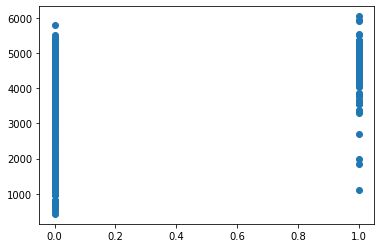

In [63]:
#棒グラフで描画
plt.figure()
plt.scatter(df_cycle_except_object['Season_Fall'], df_cycle_except_object['count'])
plt.show()

In [47]:
df_cycle_except_object

,year,mnth,weekday,temp,atemp,hum,windspeed,count,Season_Fall,Season_Spring,Season_Summer,Season_Winter,holiday_No,holiday_Yes,WorkingDay_No,WorkingDay_Yes,weathersit_Clear,weathersit_Cloudy,weathersit_Light Rain
0,2011,1,6,0.344167,0.363625,0.805833,0.160446,985,0,1,0,0,1,0,1,0,0,1,0
1,2011,1,0,0.363478,0.353739,0.696087,0.248539,801,0,1,0,0,1,0,1,0,0,1,0
2,2011,1,1,0.196364,0.189405,0.437273,0.248309,1349,0,1,0,0,1,0,0,1,1,0,0
3,2011,1,2,0.200000,0.212122,0.590435,0.160296,1562,0,1,0,0,1,0,0,1,1,0,0
4,2011,1,3,0.226957,0.229270,0.436957,0.186900,1600,0,1,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,2012,6,6,0.710833,0.648367,0.437083,0.144287,7498,0,0,1,0,1,0,1,0,1,0,0
526,2012,6,0,0.726667,0.663517,0.538333,0.133721,6598,0,0,1,0,1,0,1,0,1,0,0
527,2012,6,1,0.720833,0.659721,0.587917,0.207713,6664,0,0,1,0,1,0,0,1,0,1,0
528,2012,6,2,0.653333,0.597875,0.833333,0.214546,4972,0,0,1,0,1,0,0,1,0,1,0


In [40]:
#各変数間の相関係数確認
df_cycle_except_object.corr()

,year,mnth,weekday,temp,atemp,hum,windspeed,count,Season_Fall,Season_Spring,Season_Summer,Season_Winter,holiday_No,holiday_Yes,WorkingDay_No,WorkingDay_Yes,weathersit_Clear,weathersit_Cloudy,weathersit_Light Rain
year,1.000000,-0.452695,-0.010314,-0.115876,-0.110701,-0.169970,0.096382,0.443076,-0.312188,0.236368,0.258303,-0.302045,-0.008113,0.008113,0.000083,-0.000083,0.028080,-0.000325,-0.076142
mnth,-0.452695,1.000000,0.015301,0.371502,0.378604,0.254620,-0.225781,0.174178,0.302450,-0.610975,-0.190785,0.694583,-0.008277,0.008277,-0.001367,0.001367,0.013070,-0.057745,0.119357
weekday,-0.010314,0.015301,1.000000,-0.014238,-0.014323,-0.033017,0.003080,0.046945,0.001313,0.001943,-0.001995,-0.001251,0.107529,-0.107529,-0.036639,0.036639,-0.045093,0.037860,0.021916
temp,-0.115876,0.371502,-0.014238,1.000000,0.996399,0.176356,-0.131793,0.632053,0.592452,-0.661618,0.266985,-0.116094,0.020447,-0.020447,-0.052296,0.052296,0.074516,-0.058151,-0.048079
atemp,-0.110701,0.378604,-0.014323,0.996399,1.000000,0.186222,-0.156274,0.641070,0.576818,-0.664617,0.272314,-0.103098,0.029143,-0.029143,-0.056628,0.056628,0.075037,-0.056401,-0.054208
hum,-0.169970,0.254620,-0.033017,0.176356,0.186222,1.000000,-0.270100,-0.104621,0.056176,-0.211680,0.004266,0.201540,0.043979,-0.043979,-0.040723,0.040723,-0.571980,0.485036,0.265096
windspeed,0.096382,-0.225781,0.003080,-0.131793,-0.156274,-0.270100,1.000000,-0.182528,-0.114197,0.146637,0.076919,-0.163463,-0.035410,0.035410,0.006656,-0.006656,0.011723,-0.051796,0.107062
count,0.443076,0.174178,0.046945,0.632053,0.641070,-0.104621,-0.182528,1.000000,0.157640,-0.516841,0.434449,-0.063852,0.059565,-0.059565,-0.038356,0.038356,0.252210,-0.166203,-0.245016
Season_Fall,-0.312188,0.302450,0.001313,0.592452,0.576818,0.056176,-0.114197,0.157640,1.000000,-0.319076,-0.328791,-0.208591,0.019670,-0.019670,-0.017213,0.017213,0.070933,-0.072225,-0.000423
Season_Spring,0.236368,-0.610975,0.001943,-0.661618,-0.664617,-0.211680,0.146637,-0.516841,-0.319076,1.000000,-0.486600,-0.308709,-0.028974,0.028974,0.021179,-0.021179,0.009943,0.010790,-0.056271


In [42]:
df_cycle_except_object.columns

Index(['year', 'mnth', 'weekday', 'temp', 'atemp', 'hum', 'windspeed', 'count',
       'Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter',
       'holiday_No', 'holiday_Yes', 'WorkingDay_No', 'WorkingDay_Yes',
       'weathersit_Clear', 'weathersit_Cloudy', 'weathersit_Light Rain'],
      dtype='object')

#学習データ、検証データ分割

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [18]:
X = df_cycle_except_object.drop('count', axis=1)
y = df_cycle_except_object['count']
print(X.shape)
print(y.shape)

(530, 18)
(530,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=0)
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

#モデリング

説明変数が量的変数のためRandomForestRegressorをモデルとして使用

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
random_forest = RandomForestRegressor(random_state=0)

In [22]:
random_forest = random_forest.fit(X_train,y_train)

In [23]:
y_pred = random_forest.predict(X_test)
y_pred

array([3221.5 , 2567.75, 1971.  , 2629.46, 2414.23, 2597.07, 2596.3 ,
       1989.13, 1808.76, 1795.94, 2222.59, 2488.82, 2290.76, 2374.51,
       1834.53, 1614.42, 1800.16, 2655.54, 2698.02, 2771.16, 2673.15,
       2871.24, 2212.4 , 2398.62, 2533.37, 3476.33, 2731.51, 3057.22,
       2407.38, 2093.  , 2582.25, 2877.89, 2348.46, 2746.76, 2859.28,
       1844.29, 1730.48, 2235.94, 2661.03, 2897.68, 2707.04, 3039.28,
       2938.9 , 2067.49, 2189.05, 2482.23, 2689.75, 3250.83, 2756.74,
       2477.64, 2220.6 , 2493.28, 2636.33, 2448.24, 3407.16, 2985.57,
       2968.01, 2372.54, 2246.24, 2323.08, 2629.27, 3198.27, 2632.04,
       2617.54, 2584.14, 3574.73, 3443.1 , 3580.04, 3413.63, 3011.01,
       3594.8 , 3412.12, 3295.75, 3419.27, 3492.84, 3503.94, 3914.5 ,
       3555.77, 2518.62, 2917.44, 2644.88, 3592.9 , 3604.06, 2994.1 ,
       2660.9 , 2845.73, 3185.07, 3806.72, 3938.7 , 3237.46, 3035.14,
       3248.55, 3939.96, 3491.54, 3174.14, 2787.91, 2946.29, 3316.77,
       4423.51, 4276

In [24]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_pred,y_test)

0.5184201432660258

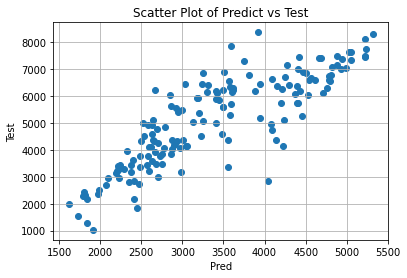

In [25]:
plt.scatter(y_pred,y_test)
plt.title('Scatter Plot of Predict vs Test')    
plt.xlabel('Pred') 
plt.ylabel('Test')    
plt.grid()                                 
plt.show()  

#モデルの評価

In [26]:
from sklearn.metrics import r2_score

In [27]:
len(y)

530

In [28]:
len(y_pred)

159

In [29]:
r2_score(y_pred,y_test)

-3.205923004879038